# **CMSC320 Final Project**

### **By: Brayden Ngo**

## Table of Contents

* 1.1 Introduction
* 1.2 Data Collection
* 2.1 Data Management/Representation
* 3.1 Exploratory Data Analysis

## Libaries Used
* Pandas
* Numpy
* Matplotlib
* Seaborn

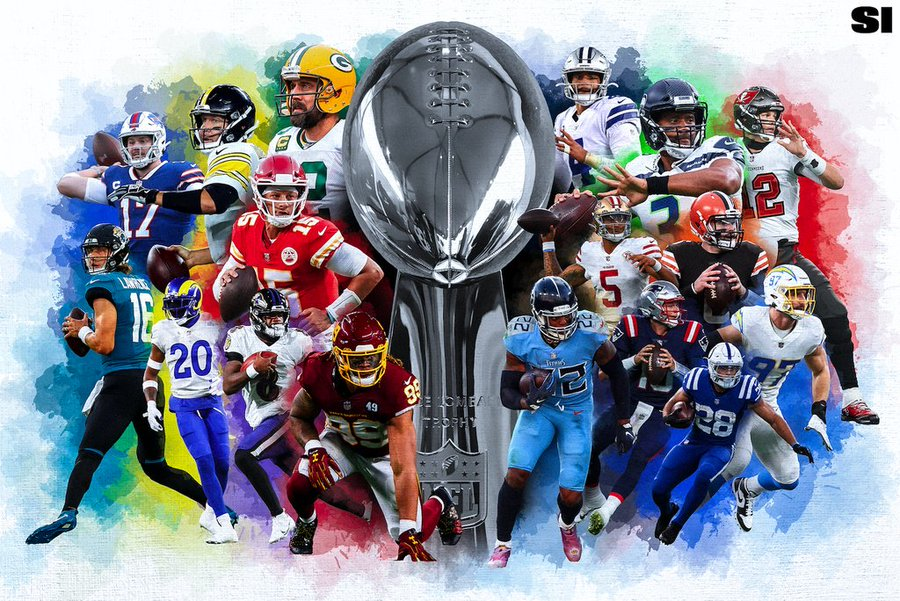

# What's In a Win: Predicting NFL Games

## 1.1: Introduction

The NFL is arguably the most popular sport in America. American football originated as a combination of soccer and rugby and was introduced at the college level in the late 1800s. By the 1920s, American football had grown in popularity to the degree where a professional league, the NFL was established. Over the years the NFL has grown tremendously in popularity as it now is estimated to be a nearly 9 billion dollar industry. In fact, the typical NFL regular season game will pull in up to 15.4 million viewers. This is significant margin compared to viewership of the other major US sports as the NBA has around 1.34 million viewers per game, the MLB has around 0.17 million, and the NHL has around 2.15 million viewers per game. As the NFL has expanded during the past decade, the use of technology has also been very prevalant. For instance, in the last few years the NFl has partenered with Amazon and its AWS software to apply machine learning algorithms to better communicate and engage with fans. For instance, AWS has been used to determine stats like passing score, 4th down decisions, expected rushing yards, and more unexpected ways. As we can see data analytics has become a more integral part of the modern NFL. With all the different moving parts that can influence the potential of the game like passing efficiency, turnover differentials, and redzone efficiency there are potentially many different factors which can impact the outcome of an NFL game. In this following tutorial we will go through our own data science process in exploring the relationship between data and the winner of NFL games.  

Sources to learn more about the NFl and data analytics within the NFL:

https://www.sportszion.com/nfl-most-popular-sport-in-america/
https://aws.amazon.com/sports/nfl/#:~:text=The%20NFL%20uses%20AWS%20to,for%20players%20on%20the%20field.

## 1.2: Data Collection

The first step in our process will be to obtain a dataset for NFL games. There are data for NFL games that can be scraped from sites such as ESPN or Pro Football Focus. However, for our dataset we can use a CSV of data of NFL games that has already been scrapped and put together on Kaggle. The following link will allow you to check out the dataset more in detail if you desire:

https://www.kaggle.com/datasets/cviaxmiwnptr/nfl-team-stats-20022019-espn

First, we'll need to import the dataset and examine what we're working with so let's go ahead and do that first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

game_df = pd.read_csv('nfl_team_stats_2002-2021.csv')

display(game_df)

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,fourth_downs_away,fourth_downs_home,passing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,def_st_td_away,def_st_td_home,possession_away,possession_home,score_away,score_home
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,0-0,0-1,166,...,0-8,0-6,13,15,0,0,27:32,32:28,16,13
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,0-0,2-2,193,...,0-9,0-8,17,18,2,0,21:06,39:08,37,31
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,0-0,0-0,228,...,0-7,0-6,17,17,0,0,31:31,28:29,23,27
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,0-0,0-0,160,...,0-7,0-5,11,15,0,0,37:48,22:12,34,6
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,0-0,0-0,276,...,0-10,0-10,20,17,0,0,30:16,29:44,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2022-01-23,Rams,Buccaneers,24,20,4-11,3-14,0-0,2-4,355,...,2-5,2-3,15,15,0,0,34:08,25:52,30,27
5353,2022-01-23,Bills,Chiefs,23,30,6-14,8-13,4-4,1-1,313,...,3-3,3-5,9,11,0,0,27:37,36:38,36,42
5354,2022-01-30,Bengals,Chiefs,21,24,8-14,6-12,0-0,0-0,243,...,1-4,3-5,10,11,0,0,35:56,29:42,27,24
5355,2022-01-30,49ers,Rams,16,25,3-9,11-18,0-0,0-1,232,...,1-1,2-6,9,9,0,0,24:21,35:39,17,20


From the following dataset, it's clear that's a numerous amount of different columns in the dataset. Let's list out the different columns first so we can see everything that we can work with.

In [2]:
print(game_df.columns)

Index(['date', 'away', 'home', 'first_downs_away', 'first_downs_home',
       'third_downs_away', 'third_downs_home', 'fourth_downs_away',
       'fourth_downs_home', 'passing_yards_away', 'passing_yards_home',
       'rushing_yards_away', 'rushing_yards_home', 'total_yards_away',
       'total_yards_home', 'comp_att_away', 'comp_att_home', 'sacks_away',
       'sacks_home', 'rushing_attempts_away', 'rushing_attempts_home',
       'fumbles_away', 'fumbles_home', 'int_away', 'int_home',
       'turnovers_away', 'turnovers_home', 'penalties_away', 'penalties_home',
       'redzone_away', 'redzone_home', 'drives_away', 'drives_home',
       'def_st_td_away', 'def_st_td_home', 'possession_away',
       'possession_home', 'score_away', 'score_home'],
      dtype='object')


Overall, I would say the majority of the features in this dataset will be very crticial to analyzing the outcome of an NFl game. The only one that could be considered to drop is def_st_td_away and def_st_td_home since typically the number of touchdowns scored by the defense and special teams will typically be very low (especially with rule changes moving the kickoff line to make returns harder) so they probably won't impact the result of the game so we will go ahead and drop those two columns. Additionally, we'll go ahead and drop fourth down conversions since 4th downs aren't frequently gone for in games typically (usually only if teams need to try to win the game).

In [3]:
game_df = game_df.drop('def_st_td_away', axis = 1)
game_df = game_df.drop('def_st_td_home', axis = 1)
game_df = game_df.drop('fourth_downs_away', axis = 1)
game_df = game_df.drop('fourth_downs_home', axis = 1)

The next thing that we might need to consider is separating out regular season games from playoff games. Afterall, there's a reason why commentators say the playoffs are a whole different beast. While it would be logical here to simply sort through the different dates and assign a new column to the type of game (either playoff or regular) an entry in the dataset corresponds to, the difficulty here is that the dates from season to season can differ widely. Also, with the addition of the 17th game during the 2021 NFl season, it will be very difficult to determine if games that were played in January or later are actually playoff or regular games from the season. In order to rectify this, we will use another data set that already provides the classification for each of the games and we will merge the two datasets together. Here is the Github Link to where you can find this particular data set (we will be using the Games table in particular):

https://github.com/nflverse/nfldata/blob/master/DATASETS.md#draft_picks

In [4]:
games_supp_df = pd.read_csv('games.csv')
display(games_supp_df)

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium
3,1999_01_OAK_GB,1999,REG,1,1999-09-12,Sunday,NaN,OAK,24.0,GB,...,10.0,00-0005741,00-0005106,Rich Gannon,Brett Favre,Jon Gruden,Ray Rhodes,Tony Corrente,GNB00,Lambeau Field
4,1999_01_BUF_IND,1999,REG,1,1999-09-12,Sunday,NaN,BUF,14.0,IND,...,NaN,00-0005363,00-0010346,Doug Flutie,Peyton Manning,Wade Phillips,Jim Mora,Ron Blum,IND99,RCA Dome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,2022_18_NYG_PHI,2022,REG,18,2023-01-08,Sunday,13:00,NYG,NaN,PHI,...,NaN,NaN,NaN,NaN,NaN,Brian Daboll,Nick Sirianni,NaN,PHI00,Lincoln Financial Field
6405,2022_18_CLE_PIT,2022,REG,18,2023-01-08,Sunday,13:00,CLE,NaN,PIT,...,NaN,NaN,NaN,NaN,NaN,Kevin Stefanski,Mike Tomlin,NaN,PIT00,Acrisure Stadium
6406,2022_18_LA_SEA,2022,REG,18,2023-01-08,Sunday,13:00,LA,NaN,SEA,...,NaN,NaN,NaN,NaN,NaN,Sean McVay,Pete Carroll,NaN,SEA00,Lumen Field
6407,2022_18_ARI_SF,2022,REG,18,2023-01-08,Sunday,13:00,ARI,NaN,SF,...,NaN,NaN,NaN,NaN,NaN,Kliff Kingsbury,Kyle Shanahan,NaN,SFO01,Levi's Stadium


In [5]:
print(games_supp_df.columns)

Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')


From the columns here the ones the only ones that we will need to keep include the season, game_type, gameday, the away_team, and the home_team.

In [6]:
games_supp_df = games_supp_df[['season', 'game_type', 'gameday', 'away_team', 'home_team']]
display(games_supp_df)

,season,game_type,gameday,away_team,home_team
0,1999,REG,1999-09-12,MIN,ATL
1,1999,REG,1999-09-12,KC,CHI
2,1999,REG,1999-09-12,PIT,CLE
3,1999,REG,1999-09-12,OAK,GB
4,1999,REG,1999-09-12,BUF,IND
...,...,...,...,...,...
6404,2022,REG,2023-01-08,NYG,PHI
6405,2022,REG,2023-01-08,CLE,PIT
6406,2022,REG,2023-01-08,LA,SEA
6407,2022,REG,2023-01-08,ARI,SF


Now we can merge together the two tables by the gameday and the away and home teams. First we will rename the columns in our new table, change the abbreviationsw for team names and then we can proceed by using a left join.

In [7]:
games_supp_df_copy = games_supp_df.copy()
games_supp_df_copy.rename(columns = {'gameday': 'date', 'away_team': 'away', 'home_team': 'home'}, inplace = True)

team_hash = {'MIN': 'Vikings','KC': 'Chiefs','PIT': 'Steelers','OAK': 'Raiders','BUF': 'Bills','SF':'49ers','CAR':'Panthers',
             'NE': 'Patriots','ARI': 'Cardinals','DET': 'Lions','BAL': 'Ravens','NYG': 'Giants','CIN':'Bengals',
             'DAL':'Cowboys','MIA':'Dolphins','NYJ': 'Jets','JAX':'Jaguars','SEA':'Seahawks','SD': 'Chargers', 'GB': 'Packers',
             'DEN':'Broncos','IND':'Colts', 'WAS': 'Washington', 'TB':'Buccaneers', 'NO':'Saints','CLE':'Browns',
             'ATL':'Falcons', 'PHI':'Eagles', 'TEN':'Titans', 'CHI':'Bears','STL':'Rams','HOU':'Texans', 'LA':'Rams', 'LAC':'Chargers',
             'LV': 'Raiders'}
for index, row in games_supp_df_copy.iterrows():
    games_supp_df_copy.at[index, 'home'] = team_hash[games_supp_df_copy.at[index, 'home']]
    games_supp_df_copy.at[index, 'away'] = team_hash[games_supp_df_copy.at[index, 'away']]

display(games_supp_df_copy)

,season,game_type,date,away,home
0,1999,REG,1999-09-12,Vikings,Falcons
1,1999,REG,1999-09-12,Chiefs,Bears
2,1999,REG,1999-09-12,Steelers,Browns
3,1999,REG,1999-09-12,Raiders,Packers
4,1999,REG,1999-09-12,Bills,Colts
...,...,...,...,...,...
6404,2022,REG,2023-01-08,Giants,Eagles
6405,2022,REG,2023-01-08,Browns,Steelers
6406,2022,REG,2023-01-08,Rams,Seahawks
6407,2022,REG,2023-01-08,Cardinals,49ers


In [8]:
game_df = game_df.merge(games_supp_df_copy, on=['date', 'away', 'home'], how='left')
display(game_df)

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,...,redzone_away,redzone_home,drives_away,drives_home,possession_away,possession_home,score_away,score_home,season,game_type
0,2002-09-05,49ers,Giants,13,21,4-12,9-16,166,318,113,...,0-8,0-6,13,15,27:32,32:28,16,13,2002,REG
1,2002-09-08,Jets,Bills,18,26,2-8,7-17,193,242,73,...,0-9,0-8,17,18,21:06,39:08,37,31,2002,REG
2,2002-09-08,Vikings,Bears,19,20,5-13,7-13,228,288,140,...,0-7,0-6,17,17,31:31,28:29,23,27,2002,REG
3,2002-09-08,Chargers,Bengals,27,13,6-10,4-11,160,167,241,...,0-7,0-5,11,15,37:48,22:12,34,6,2002,REG
4,2002-09-08,Chiefs,Browns,24,24,5-11,4-11,276,352,194,...,0-10,0-10,20,17,30:16,29:44,40,39,2002,REG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2022-01-23,Rams,Buccaneers,24,20,4-11,3-14,355,308,73,...,2-5,2-3,15,15,34:08,25:52,30,27,2021,DIV
5353,2022-01-23,Bills,Chiefs,23,30,6-14,8-13,313,370,109,...,3-3,3-5,9,11,27:37,36:38,36,42,2021,DIV
5354,2022-01-30,Bengals,Chiefs,21,24,8-14,6-12,243,236,116,...,1-4,3-5,10,11,35:56,29:42,27,24,2021,CON
5355,2022-01-30,49ers,Rams,16,25,3-9,11-18,232,326,50,...,1-1,2-6,9,9,24:21,35:39,17,20,2021,CON


Perfect! Now, that we've combined the two tables we've collected all of our data so we can move on to more precisely cleaning up the data and making any adjustments that we will need to do before plotting anything in later steps. 

## 2.1 Data Management/Representation

The first thing we will do is to drop all the row that aren't regular season games (i.e. this means dropping any rows whose game_type value isn't 'REG')

In [9]:
game_df = game_df[game_df['game_type'] == 'REG']

The next thing we need to do is to calculate new columns for our data frame. For example, one thing that will be helpful is to calculate the average winning percentage by team. Another thing we will want to consider is to add a new column so we can more easily tell who is the winner of the game instead of having to compare the scores for the home and away team every single time we examine an entry. Additionally, the format for columns such as third_down_away and third_downs_home are in a format of a string like '4-11' and this won't be useable for numerical analysis so we'll need to address this. Additionally, we will drop games that were tied since we can't determine a winner.

In [10]:
# drops all games that ended in a tie
game_df = game_df[~(game_df['score_away'] == game_df['score_home'])]

# create a new column for the winner
game_df['Winner'] = np.nan

# assign winners for each row
for index, row in game_df.iterrows():
    if(row.score_away > row.score_home):
        game_df.loc[index, 'Winner'] = 'Away'
    else:
        game_df.loc[index, 'Winner'] = 'Home'
display(game_df.tail(5))

,date,away,home,first_downs_away,first_downs_home,third_downs_away,third_downs_home,passing_yards_away,passing_yards_home,rushing_yards_away,...,redzone_home,drives_away,drives_home,possession_away,possession_home,score_away,score_home,season,game_type,Winner
5339,2022-01-09,49ers,Rams,23,19,9-14,10-17,314,201,135,...,3-4,11,11,36:44,31:24,27,24,2021,REG,Away
5340,2022-01-09,Patriots,Dolphins,21,23,5-10,7-15,245,103,134,...,2-3,10,9,26:24,33:36,24,33,2021,REG,Home
5341,2022-01-09,Seahawks,Cardinals,19,20,8-12,9-18,229,187,202,...,1-3,11,10,24:11,35:49,38,30,2021,REG,Away
5342,2022-01-09,Panthers,Buccaneers,18,21,4-14,4-11,207,324,110,...,3-3,12,12,35:05,24:55,17,41,2021,REG,Home
5343,2022-01-09,Chargers,Raiders,27,24,4-18,8-17,355,172,85,...,3-5,11,13,31:19,38:41,32,35,2021,REG,Home


In [49]:
# create a new empty dataframe
team_df = pd.DataFrame()

# get the list of teams
teams = game_df['away'].unique()
team_df['teams'] = teams

# create list for the wins for each team
team_win_lst = []
# create list for third down conversion
third_down_rate_lst = []
# create list for passing yards
passing_yards_lst = []
# create list for rushing yards
rushing_yards_lst = []
# create list for total yards
total_yards_lst = []
# create list for completion percentage
comp_percentage_lst = []
# create list for sacks
sacks_lst = []
# create list for rushing attempts
rushing_attempts_lst = []
# create list for fumbles
fumbles_lst = []
# create list for interceptions
interceptions_lst = []
# create list for # of penalties
penalties_lst = []
# create list for yards by penalties
penalty_yards_lst = []
# create list for number of drives
drives_lst = []
# create list for redzone trips
redzone_trips_lst = []
# create list for redzones ratio (touchdowns made out of tripe)
redzone_ratio_lst = []
# create list for turnover total
turnovers_lst = []

for team in teams:
    wins = 0
    third_downs_attempted = 0
    third_downs_made = 0
    passing_yards = 0
    rushing_yards = 0
    total_yards = 0
    completions_made = 0
    completions_attempted = 0
    sacks = 0
    rushing_attempts = 0
    fumbles = 0
    interceptions = 0
    penalties = 0
    penalty_yards = 0
    drives = 0
    redzone_trips = 0
    redzone_made = 0
    turnovers = 0
    
    temp_df = game_df[(game_df['away'] == team) | (game_df['home'] == team)]
    for index, row in temp_df.iterrows():
        if row.away == team and row.score_away > row.score_home:
            wins += 1
        elif row.home == team and row.score_home > row.score_away:
            wins += 1
           
        if row.away == team:
            third_downs_made += int(row.third_downs_away[0:row.third_downs_away.index('-')])
            third_downs_attempted += int(row.third_downs_away[row.third_downs_away.index('-') + 1:])
            passing_yards += row.passing_yards_away
            rushing_yards += row.rushing_yards_away
            total_yards += row.total_yards_away
            completions_made += int(row.comp_att_away[0:row.comp_att_away.index('-')])
            completions_attempted += int(row.comp_att_away[row.comp_att_away.index('-') + 1:])
            sacks += int(row.sacks_away[0:row.sacks_away.index('-')])
            rushing_attempts += row.rushing_attempts_away
            fumbles += row.fumbles_away
            interceptions += row.int_away
            penalties += int(row.penalties_away[0:row.penalties_away.index('-')])
            penalty_yards += int(row.penalties_away[row.penalties_away.index('-') + 1:])
            drives += row.drives_away
            redzone_made += int(row.redzone_away[0:row.redzone_away.index('-')])
            redzone_trips += int(row.redzone_away[row.redzone_away.index('-') + 1:])
            turnovers += row.turnovers_away
        else:
            third_downs_made += int(row.third_downs_home[0:row.third_downs_home.index('-')])
            third_downs_attempted += int(row.third_downs_home[row.third_downs_home.index('-') + 1:])
            passing_yards += row.passing_yards_home
            rushing_yards += row.rushing_yards_home
            total_yards += row.total_yards_home
            completions_made += int(row.comp_att_home[0:row.comp_att_home.index('-')])
            completions_attempted += int(row.comp_att_home[row.comp_att_home.index('-') + 1:])
            sacks += int(row.sacks_home[0:row.sacks_home.index('-')])
            rushing_attempts += row.rushing_attempts_home
            fumbles += row.fumbles_home
            interceptions += row.int_home
            penalties += int(row.penalties_home[0:row.penalties_home.index('-')])
            penalty_yards += int(row.penalties_home[row.penalties_home.index('-') + 1:])
            drives += row.drives_home
            redzone_made += int(row.redzone_home[0:row.redzone_home.index('-')])
            redzone_trips += int(row.redzone_home[row.redzone_home.index('-') + 1:])
            turnovers += row.turnovers_home
        
    team_win_lst.append(wins / len(temp_df))
    third_down_rate_lst.append(third_downs_made / third_downs_attempted)
    passing_yards_lst.append(passing_yards / len(temp_df))
    rushing_yards_lst.append(rushing_yards / len(temp_df))
    total_yards_lst.append(total_yards / len(temp_df))
    comp_percentage_lst.append(completions_made / completions_attempted)
    sacks_lst.append(sacks/ len(temp_df))
    rushing_attempts_lst.append(rushing_attempts / len(temp_df))
    fumbles_lst.append(fumbles / len(temp_df))
    interceptions_lst.append(interceptions / len(temp_df))
    penalties_lst.append(penalties / len(temp_df))
    penalty_yards_lst.append(penalty_yards / len(temp_df))
    drives_lst.append(drives / len(temp_df))
    redzone_trips_lst.append(redzone_trips / len(temp_df))
    redzone_ratio_lst.append(redzone_made / redzone_trips)
    turnovers_lst.append(turnovers / len(temp_df))

team_df['win_rate'] = team_win_lst
team_df['third_down_rate'] = third_down_rate_lst
team_df['passing_yards_avg'] = passing_yards_lst
team_df['rushing_yards_avg'] = rushing_yards_lst
team_df['total_yards_avg'] = total_yards_lst
team_df['comp_percentage'] = comp_percentage_lst
team_df['sack_avg'] = sacks_lst
team_df['rushing_attempts_avg'] = rushing_attempts_lst 
team_df['fumbles_avg'] = fumbles_lst
team_df['interceptions_avg'] = interceptions_lst
team_df['penalties_avg'] = penalties_lst
team_df['penalties_yards_avg'] = penalty_yards_lst
team_df['drives_avg'] = drives_lst
team_df['redzone_trips_avg'] = redzone_trips_lst
team_df['redzone_ratio'] = redzone_ratio_lst
team_df['turnover_avg'] = turnovers_lst
display(team_df.head(10))


,teams,win_rate,third_down_rate,passing_yards_avg,rushing_yards_avg,total_yards_avg,comp_percentage,sack_avg,rushing_attempts_avg,fumbles_avg,interceptions_avg,penalties_avg,penalties_yards_avg,drives_avg,redzone_trips_avg,redzone_ratio,turnover_avg
0,49ers,0.456250,0.362110,202.721875,119.950000,322.671875,0.604096,2.653125,27.618750,0.706250,0.875000,6.471875,53.637500,12.487500,3.303125,0.356670,1.581250
1,Jets,0.420561,0.376327,195.956386,115.791277,311.747664,0.596262,2.467290,28.127726,0.588785,1.056075,5.856698,49.233645,12.267913,3.090343,0.348790,1.644860
2,Vikings,0.514107,0.393597,217.711599,127.087774,344.799373,0.640479,2.507837,27.934169,0.667712,0.855799,6.385580,53.257053,12.275862,3.470219,0.373984,1.523511
3,Chargers,0.535826,0.427191,246.274143,112.710280,358.984424,0.640965,1.928349,27.352025,0.566978,0.884735,6.336449,51.853583,11.825545,3.757009,0.407131,1.451713
4,Chiefs,0.557632,0.399613,229.068536,124.146417,353.214953,0.626895,2.190031,27.697819,0.582555,0.738318,6.221184,51.423676,12.065421,3.520249,0.377876,1.320872
5,Falcons,0.510972,0.418109,233.181818,116.188088,349.369906,0.628650,2.235110,27.222571,0.579937,0.849530,5.796238,50.360502,11.871473,3.536050,0.383865,1.429467
6,Eagles,0.567398,0.399583,238.012539,123.235110,361.247649,0.608857,2.435737,27.159875,0.749216,0.858934,6.648903,55.103448,12.460815,3.510972,0.405357,1.608150
7,Lions,0.347962,0.369529,234.536050,92.808777,327.344828,0.604919,2.363636,23.595611,0.595611,1.078370,6.714734,55.689655,12.257053,3.112853,0.399799,1.673981
8,Cardinals,0.457680,0.369627,228.012539,97.526646,325.539185,0.601331,2.489028,25.028213,0.692790,1.112853,6.771160,54.768025,12.614420,3.316614,0.403592,1.805643
9,Ravens,0.582555,0.392490,205.573209,128.669782,334.242991,0.609504,2.168224,29.875389,0.651090,0.878505,6.819315,57.302181,12.520249,3.414330,0.388686,1.529595


Now that we have our new dataframe with different statistics according to each team, we can begin to plot our data and start performing an exploratory analysis. 

## 3.1: Exploratory Data Analysis

The first thing we'll do before going into a deeper analysis into games is simply to graph which teams have the best win rates. 

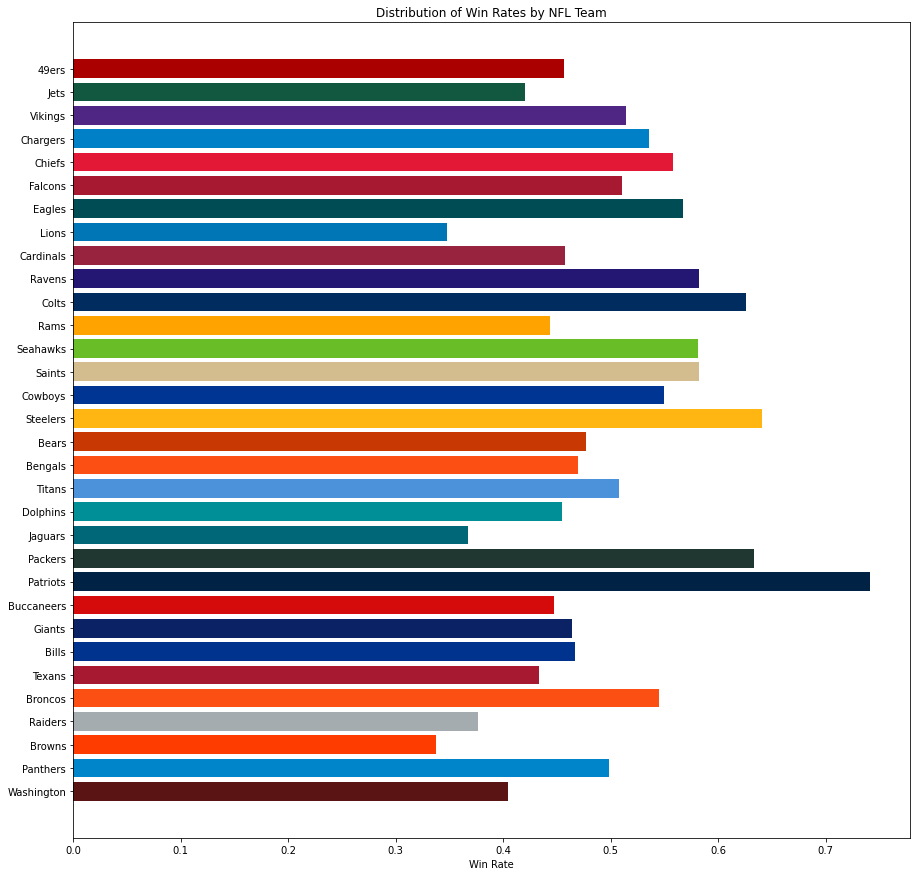

In [18]:
fig, ax = plt.subplots(figsize = (15,15))

teams = tuple(team_df['teams'])
y_pos = np.arange(len(teams))
win_rates = team_df['win_rate']
colors = ['#AA0000', '#125740', '#4F2683', '#0080C6', '#E31837', '#A71930', '#004C54', '#0076B6', '#97233F', '#241773', '#002C5F',
         '#FFA300', '#69BE28', '#D3BC8D', '#003594', '#FFB612', '#C83803', '#FB4F14', '#4B92DB', '#008E97', '#006778', '#203731',
         '#002244', '#D50A0A', '#0B2265', '#00338D', '#A71930', '#FB4F14','#A5ACAF', '#FF3C00', '#0085CA', '#5A1414']

ax.barh(y_pos, win_rates, align='center', color = colors )
ax.set_yticks(y_pos, labels=teams)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Win Rate')
ax.set_title('Distribution of Win Rates by NFL Team')

plt.show()

From the horizontal bar graph above, we can see that some of the most successful teams in terms of win rate include the Patriots (who have over a 70 percent win rate), the Steelers, Packers, Colts, Ravens, Seahawks, and Saints. Some of the lowest winning teams include the Lions, Browns, Jaguars, and the Raiders. Now that we've taken a look at the win rates, let's start analyzing the impact of different factors on the games and teams' winrate. 

First, let's take a look at the relationship between the total yards average in a game compared to the win rate of a team. We can do this simply by using a scatter plot. We'll also add a regression line just so we can take a look at the relationship better.

Text(0.5, 1.0, 'Average Win Rate vs. Average Total Yards by NFL Team')

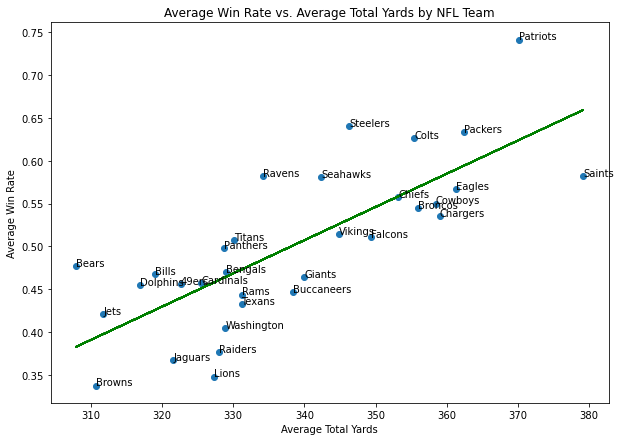

In [13]:
plt.figure(figsize = (10, 7))        
plt.scatter(team_df['total_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_total_yards = list(team_df['total_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_total_yards[index], avg_win_rate[index]))
    x = np.array(avg_total_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Average Total Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Total Yards by NFL Team')

From the graph above it's clear that the more yards accumulated the higher the win rate. Let's see if we can get a better deeper breakdown between rushing yards and passing yards on wins.

Text(0.5, 1.0, 'Average Win Rate vs. Average Passing Yards by NFL Team')

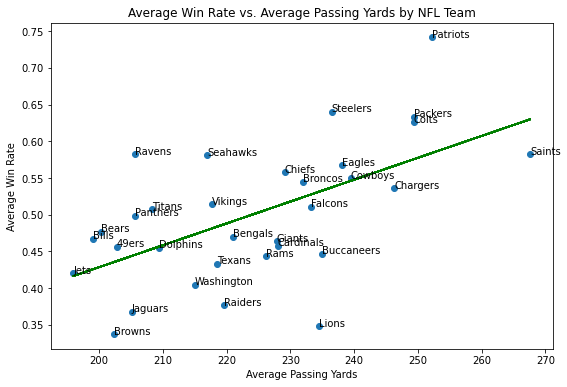

In [14]:
plt.figure(figsize = (9, 6))        
plt.scatter(team_df['passing_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_passing_yards = list(team_df['passing_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_passing_yards[index], avg_win_rate[index]))
    x = np.array(avg_passing_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Average Passing Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Passing Yards by NFL Team')

plt.figure(figsize = (9, 6))        
plt.scatter(team_df['rushing_yards_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
avg_rushing_yards = list(team_df['rushing_yards_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (avg_rushing_yards[index], avg_win_rate[index]))
    x = np.array(avg_rushing_yards)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Average Rushing Yards")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Average Rushing Yards by NFL Team')
plt.show()

From the graphs above it seems that more passing and more rushing yards individaully result in an increase average win rate. Although, it appears that the the slope for passing yards is steeper which indicates a stronger relation between passing yards and win rate. Let's lastly create a bar graph to directly compare passing and rushing yards for winning and losing teams.

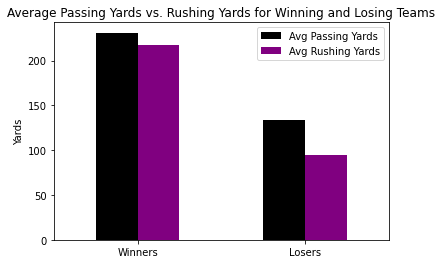

In [16]:
winning_values = []
losing_values = []

win_pass_total = 0
win_run_total = 0
lose_pass_total = 0
lose_run_total = 0

for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        win_pass_total += row.passing_yards_home
        win_run_total += row.rushing_yards_home
        lose_pass_total += row.passing_yards_away
        lose_run_total += row.rushing_yards_away
    else:
        win_pass_total += row.passing_yards_away
        win_run_total += row.rushing_yards_away
        lose_pass_total += row.passing_yards_home
        lose_run_total += row.rushing_yards_home
winning_values.append(win_pass_total / len(game_df))
winning_values.append(win_run_total / len(game_df))

losing_values.append(lose_pass_total / len(game_df))
losing_values.append(lose_run_total / len(game_df))


index = ['Winners', 'Losers']


df = pd.DataFrame({'Avg Passing Yards': winning_values,
                    'Avg Rushing Yards': losing_values}, index=index)

ax = df.plot.bar(rot=0, color={"Avg Passing Yards": "black", "Avg Rushing Yards": "purple"}, ylabel = 'Yards', title = 'Average' + 
                 ' Passing Yards vs. Rushing Yards for Winning and Losing Teams')

From here it's evident that although teams have more passing yards whether they win or lose, the gap between passing and rushing yards for losing teams is significantly greater. A possible reason for this is that when teams are playing from behind, they will be forced to pass more since they need to move the ball down the field quicker to score which would result in less rushing and more passing.

Now let's take a look at the effect of third down conversions on team winning percentage. For those not familiar with what this means, completing a third down essentially will allow a team's offense to continue moving the ball down the field with a new set of downs. If the third down is not converted a team can either try again on a 4th down (but give possession over if they fail) or the alternative which is typically to punt the ball to the other team.

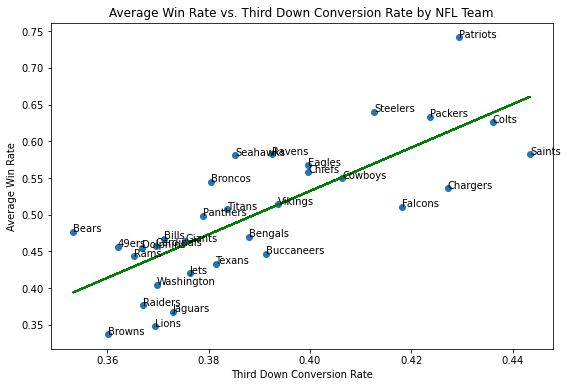

In [28]:
plt.figure(figsize = (9, 6))        
plt.scatter(team_df['third_down_rate'], team_df['win_rate'])

team_labels = list(team_df['teams'])
third_down_rate = list(team_df['third_down_rate'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (third_down_rate[index], avg_win_rate[index]))
    x = np.array(third_down_rate)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Third Down Conversion Rate")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Third Down Conversion Rate by NFL Team')
plt.show()

Now let's examine the impact of turnovers on games. First, let's make a grouped bar chart of the different types of turnovers (fumbles and interceptions) for winning teams and losing teams.

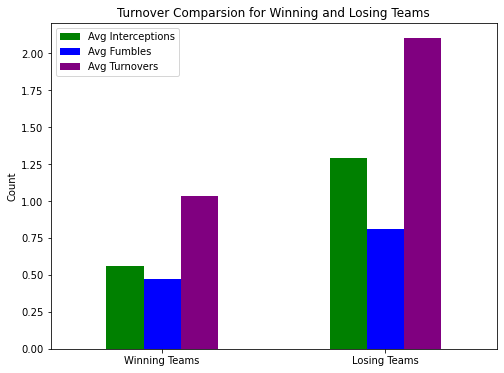

In [47]:
interception_values = []
fumble_values = []
turnover_values = []

win_interception_total = 0
win_fumble_total = 0
lose_interception_total = 0
lose_fumble_total = 0
win_turnover_total = 0
lose_turnover_total = 0

for index, row in game_df.iterrows():
    if row.Winner == 'Home':
        win_interception_total += row.int_home
        win_fumble_total += row.fumbles_home
        lose_interception_total += row.int_away
        lose_fumble_total += row.fumbles_away
        win_turnover_total += row.turnovers_home
        lose_turnover_total += row.turnovers_away
    else:
        win_interception_total += row.int_away
        win_fumble_total += row.fumbles_away
        lose_interception_total += row.int_home
        lose_fumble_total += row.fumbles_home
        win_turnover_total += row.turnovers_away
        lose_turnover_total += row.turnovers_home
        
interception_values.append(win_interception_total / len(game_df))
interception_values.append(lose_interception_total/ len(game_df))
fumble_values.append(win_fumble_total / len(game_df))
fumble_values.append(lose_fumble_total / len(game_df))
turnover_values.append(win_turnover_total / len(game_df))
turnover_values.append(lose_turnover_total / len(game_df))

index = ['Winning Teams', 'Losing Teams']


df = pd.DataFrame({'Avg Interceptions': interception_values, 'Avg Fumbles': fumble_values, 'Avg Turnovers': turnover_values }, index=index)

ax = df.plot.bar(rot=0, color={"Avg Interceptions": "green", "Avg Fumbles": "blue", 'Avg Turnovers': 'purple'}, ylabel = 'Count', title = 'Turnover' + 
                 ' Comparsion for Winning and Losing Teams', figsize = (8,6))

As we can see from the above bar plot, losing teams have more interceptions and fumbles compared to winning teams. The margin between interceptions and fumbles is also greater for losing teams than it is for winning teams. This may have something to do with losing teams being forced to pass the ball more when they are playing from behind which would lead to potentially more dangerous passes and thus a greater opportunity for the opposing defense to intercept the ball. Lastly, as we can see from the purple bar fur turnovers, the losing team has approximately double the number of turnovers as the winning team so it's clear that there appears to be a negative correlation between turnovers and winning where the more turnovers a team commits, the lower the win rate. Let's solidify this by making a scatter plot of turnovers vs. win rate. 

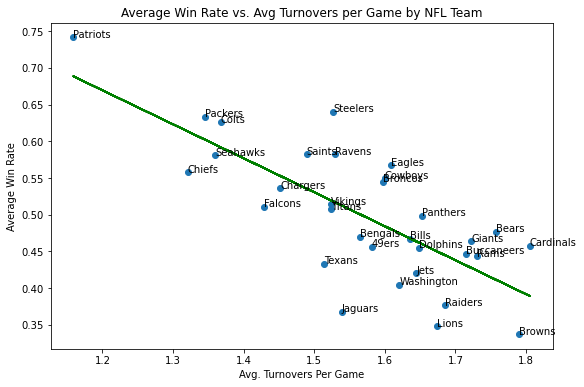

In [54]:
plt.figure(figsize = (9, 6))        
plt.scatter(team_df['turnover_avg'], team_df['win_rate'])

team_labels = list(team_df['teams'])
turnover_avg = list(team_df['turnover_avg'])
avg_win_rate = list(team_df['win_rate'])

for index, team_label in enumerate(team_labels):
    plt.annotate(team_label, (turnover_avg[index], avg_win_rate[index]))
    x = np.array(turnover_avg)
    y = np.array(avg_win_rate)
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color = 'g')

plt.xlabel("Avg. Turnovers Per Game")
plt.ylabel("Average Win Rate")
plt.title('Average Win Rate vs. Avg Turnovers per Game by NFL Team')
plt.show()

As we can see from the scatter plot above, it confirms that there's a pretty strong inverse correlation between turnovers and win rate where as turnovesr increase, the win rate decreases. Recall, back to our intial plot of win rates by team, we can see here that some of the most successful teams like the Patriots have the lowest average turnover per game at around 1.2 and have nearly a 75% win rate. On the other hand, some of the worst teams we mentioned previosuly such as the Raiders, Lions, and the Browns have some of the highest turnover averages with the Browns at nearly 1.8 per game and a 35% winning percentage.